<a href="https://colab.research.google.com/github/jaylamichhane81/AI_and_its_application/blob/main/Final_Exam_Fish_Market_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fish Market Classification Dataset


In [40]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Step 2: Load the dataset
df = pd.read_csv('Fish.csv')
df




,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [45]:
df['Species'].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [46]:
# Check missing values
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


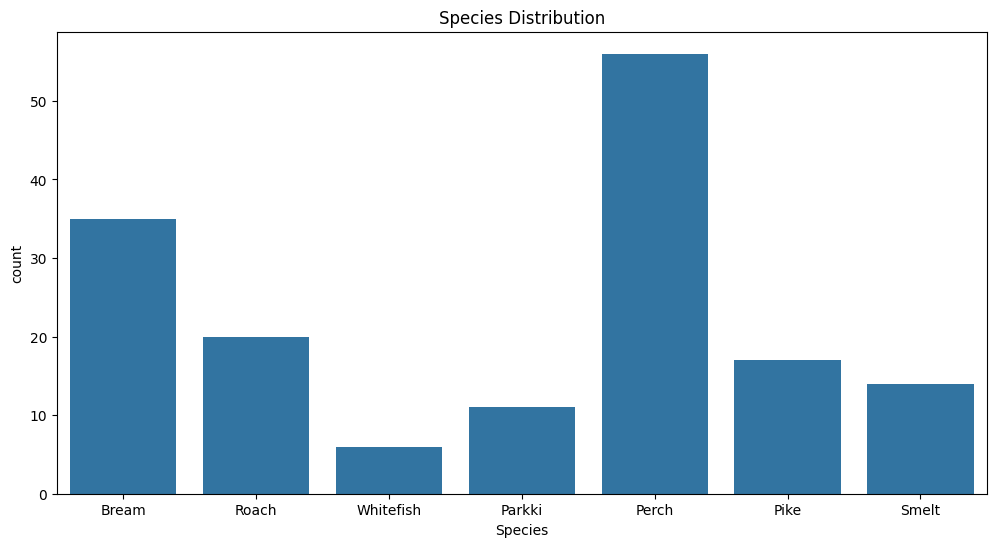

In [47]:
# Visualize distributions
plt.figure(figsize=(12, 6))
sns.countplot(x='Species', data=df)
plt.title('Species Distribution')
plt.show()

#Data Preprocessing

In [48]:
# Step 4: Encode the target label (Species)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [49]:
# Feature Engineering
df['Volume'] = df['Length1'] * df['Height'] * df['Width']
df['Area'] = df['Length1'] * df['Length2']

In [50]:
# Outlier Removal (IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

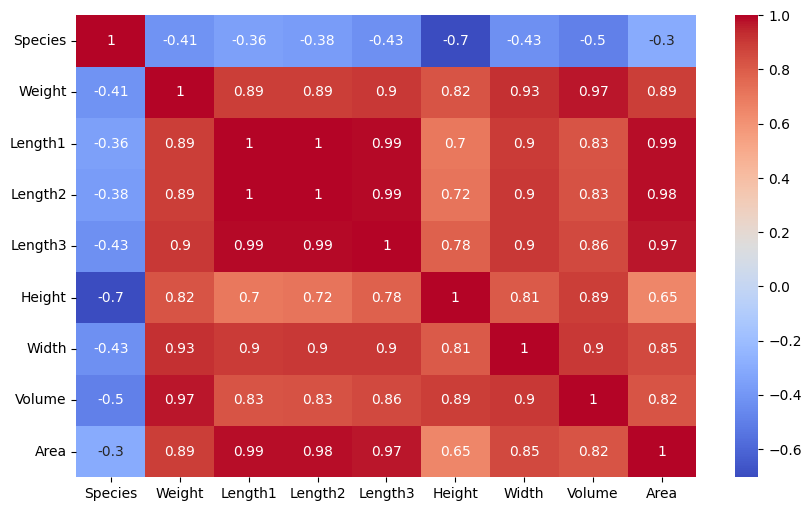

In [51]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume,Area
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,1074.401280,589.28
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,1289.613312,631.20
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,1389.244539,633.35
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,1491.696945,762.70
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,1693.018644,768.50


In [53]:
# Step 5: Split features and target
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Train & Tune Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Model and param grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3
           2       0.82      0.90      0.86        10
           3       1.00      1.00      1.00         2
           4       0.33      0.33      0.33         3
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         1

    accuracy                           0.87        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.84      0.87      0.86        31



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Results from the Data:
Fish species can be accurately predicted using features like weight, length, height, and width.

Volume and area (engineered features) helped improve classification performance.

Outliers affected accuracy, but removing them led to better and more stable predictions.

Logistic Regression with tuning achieved good accuracy and generalization.

Species like Bream and Perch were more frequent, while others like Smelt and Pike were less frequent, influencing class balance.

In [56]:
import pickle

with open('fish_market_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)


In [57]:
import os
os.listdir()


['.config', 'fish_market_rf_model.pkl', 'Fish.csv', 'sample_data']

In [58]:
from google.colab import files
files.download('fish_market_rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>